In [46]:
import pandas as pd

import numpy as np

from scipy import stats
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

par_o = pd.read_csv("/Users/cmdb/Downloads/aau1043_dnm.csv")
p_ag = pd.read_csv("/Users/cmdb/Downloads/aau1043_parental_age.csv")
p_ag
#parental_age


,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


In [47]:
#total = pd.DataFrame[Proband_id].value_counts()

In [48]:
# Proband_id, pat_dnm, mat_dnm, tot_dnm

#mutations = par_o["Proband_id"].value_counts()

#Prob_id = pd.DataFrame(par_o["Proband_id"].value_counts())
#Prob_mom = pd.DataFrame((par_o["Phase_combined"] == "mother").value_counts())
#Prob_dad = pd.DataFrame((par_o["Phase_combined"] == "father").value_counts())
#Prob_combined = pd.DataFrame(par_o["Phase_combined"].value_counts())



#Prob_id.index.name('Proband_id')
#Prob_id.reset_index()

prob_id = par_o["Proband_id"]
mom = par_o[par_o["Phase_combined"] == "mother"]
dad = par_o[par_o["Phase_combined"] == "father"]
combined = par_o["Phase_combined"]

Prob_mom = mom["Proband_id"].value_counts().rename_axis("Proband_id").reset_index(name= "Mother_Mutations")
Prob_dad = dad["Proband_id"].value_counts().rename_axis("Proband_id").reset_index(name= "Father_Mutations")

FF= pd.merge(Prob_mom, Prob_dad, on="Proband_id")

MUT = pd.merge(p_ag, FF, on="Proband_id")
#prob_id['Prob_id'] = Prob_id

MUT


,Proband_id,Father_age,Mother_age,Mother_Mutations,Father_Mutations
0,675,31,36,19,51
1,1097,19,19,12,26
2,1230,30,28,12,42
3,1481,32,20,14,53
4,1806,38,34,11,61
...,...,...,...,...,...
391,153657,27,23,8,41
392,154565,36,30,14,61
393,154621,19,18,11,39
394,154810,32,28,14,55


# Question 5

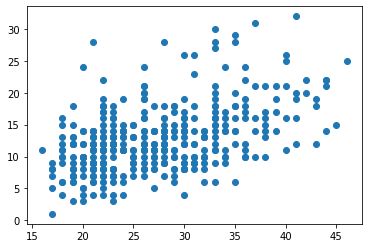

In [49]:
fig,ax = plt.subplots()
ax.scatter(MUT["Mother_age"], MUT["Mother_Mutations"])
plt.show()

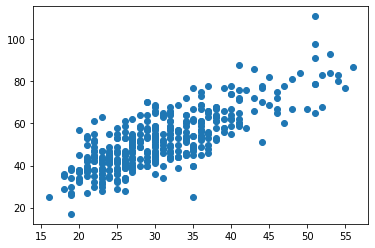

In [50]:
fig,ax = plt.subplots()
ax.scatter(MUT["Father_age"], MUT["Father_Mutations"])
plt.show()

# Question 6

In [51]:
model = smf.ols(formula="Mother_age ~ Mother_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Mother_age   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        19:25:52   Log-Likelihood:                -1250.7
No. Observations:                 396   AIC:                             2505.
Df Residuals:                     394   BIC:                             2513.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           19.5164      0.770     25.336      0.000      18.002      21.031
Mother_Mutations     0.6026      0.056     10.772      0.000       0.493       0.713
==============================================================================
Omnibus:                       10.828   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.046
Skew:                           0.385   Prob(JB):                      0.00399
Kurtosis:                       2.723   Cond. No.                         37.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a. yes, the relationship is significant because the p values is less than 0.00
#### b. the correlation coefficient is 0.6

# Question 7

In [52]:
model = smf.ols(formula="Father_age ~ Father_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:25:54   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a. yes, the relationship is significant because the p values is less than 0.00
#### b. the correlation coefficient is 0.46

# Question 8

In [53]:
Mother_bins = int(max(MUT["Mother_Mutations"])-min(MUT["Mother_Mutations"]))
Father_bins = int(max(MUT["Father_Mutations"])-min(MUT["Father_Mutations"]))


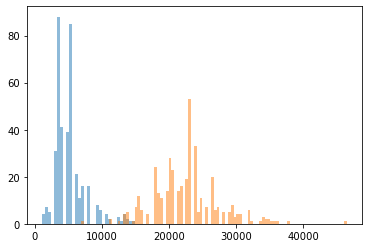

In [54]:
fig,ax = plt.subplots()
ax.hist(MUT["Proband_id"][MUT["Mother_Mutations"]], bins =Mother_bins, alpha =0.5)
ax.hist(MUT["Proband_id"][MUT["Father_Mutations"]], bins =Father_bins, alpha = 0.5)
plt.show()

# Question 9

In [55]:
stats.ttest_ind(MUT["Proband_id"][MUT["Mother_Mutations"]], MUT["Proband_id"][MUT["Father_Mutations"]])

Ttest_indResult(statistic=-63.904595461743035, pvalue=2.219919015e-314)

# Question 10

In [56]:
smf.poisson(formula="Mother_age ~ Mother_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:25:58   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
smf.poisson(formula="Mother_age ~ Mother_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        19:26:00   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
smf.poisson(formula="Father_age ~ Father_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        20:01:55   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
smf.poisson(formula="Father_age ~ Father_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        20:14:03   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
smf.poisson(formula="Mother_Mutations ~ Father_Mutations", data = MUT)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Father_age   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Mon, 07 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        20:38:33   Log-Likelihood:                -1191.6
No. Observations:                 396   AIC:                             2387.
Df Residuals:                     394   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.0178      0.972      7.220      0.000       5.107       8.929
Father_Mutations     0.4571      0.018     25.291      0.000       0.422       0.493
==============================================================================
Omnibus:                        3.967   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                3.721
Skew:                           0.226   Prob(JB):                        0.156
Kurtosis:                       3.146   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 11

In [67]:
# P(m)= (e^-lamda(50.5))*((lamda(50.5))^m)/m! - I think this equation is for predicting the probability of a given outcome?

y= 50.5*0.46
y


23.23

#### 

